<a href="https://colab.research.google.com/github/vishu17-vains/Deep-learning/blob/main/Mood_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!nvidia-smi

Sun Jan 26 08:10:17 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [4]:
img = image.load_img('/content/drive/MyDrive/mood classification /training/happy/happy4.jpeg')

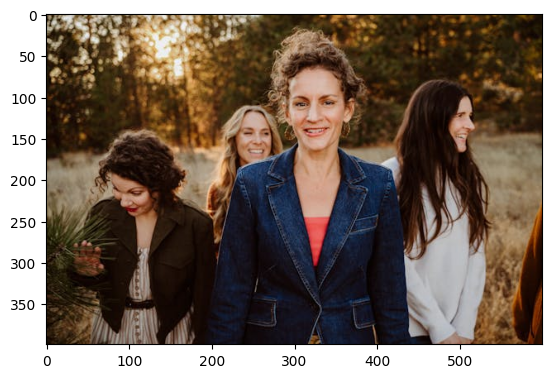

In [5]:
plt.imshow(img)

array([[[ 87, 112, 122],
        [102, 126, 138],
        [ 87, 113, 127],
        ...,
        [  5,  22,  31],
        [  6,  23,  32],
        [  7,  24,  33]],

       [[ 88, 113, 123],
        [ 77, 101, 113],
        [ 72,  98, 112],
        ...,
        [  3,  20,  29],
        [  4,  21,  30],
        [  5,  22,  31]],

       [[ 74,  96, 108],
        [ 50,  74,  86],
        [ 65,  91, 105],
        ...,
        [  3,  18,  27],
        [  3,  18,  27],
        [  3,  18,  27]],

       ...,

       [[  4,  10,  17],
        [  7,  13,  20],
        [  8,  15,  24],
        ...,
        [  2,  16,  58],
        [  1,  17,  59],
        [  1,  19,  60]],

       [[  3,   9,  16],
        [  5,  11,  18],
        [  4,  11,  20],
        ...,
        [  0,  16,  58],
        [  0,  17,  60],
        [  1,  18,  61]],

       [[  3,   7,  12],
        [  4,  10,  17],
        [  4,  11,  20],
        ...,
        [  0,  16,  58],
        [  1,  18,  61],
        [  0,  18,  61]]], dtype=uint8)
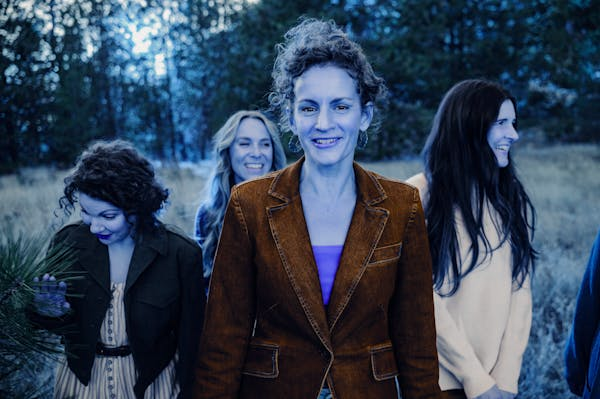

In [6]:
i1 = cv2.imread('/content/drive/MyDrive/mood classification /training/happy/happy4.jpeg')
i1

In [7]:
i1.shape
# shape of your image height, weight, rgb


(399, 600, 3)

In [8]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [39]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/mood classification /training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory('/content/drive/MyDrive/mood classification /validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')


Found 6 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [40]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [41]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [31]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), # Changed 'lr' to 'learning_rate'
              metrics = ['accuracy']
              )

In [36]:
model_fit = model.fit(train_dataset,
                    steps_per_epoch = 3,
                     epochs = 10)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7778 - loss: 0.3945 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4444 - loss: 2.1853 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7778 - loss: 0.5521 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8889 - loss: 0.3613 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8889 - loss: 0.3793 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7778 - loss: 0.3209 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7778 - loss: 0.3785 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8889 - loss: 0.1176 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1113 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0434  


happy5.jpeg


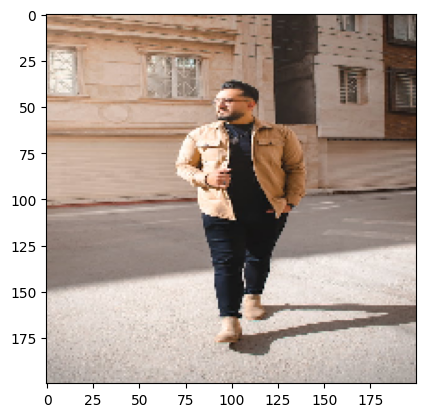

pexels-photo-3905727.webp


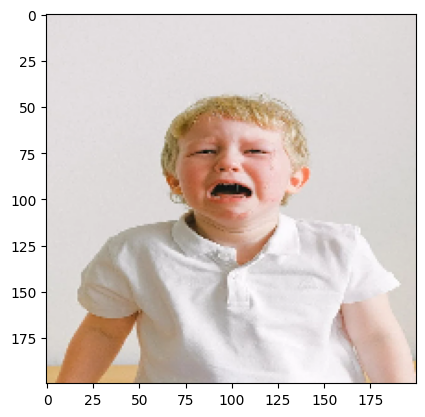

happy.jpeg


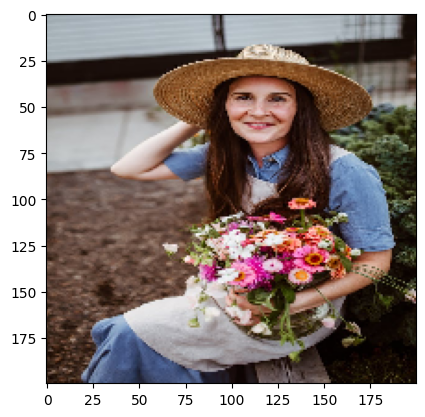

pexels-photo-8963525.webp


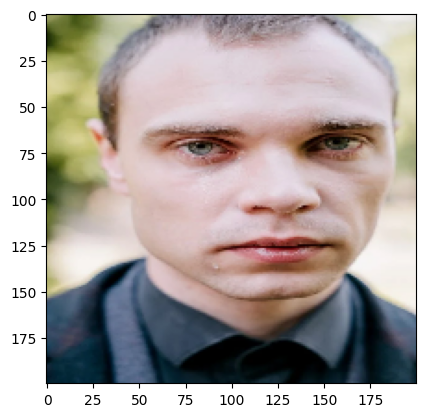

free-photo-of-joyful-woman-journaling-in-a-grassy-field.jpeg


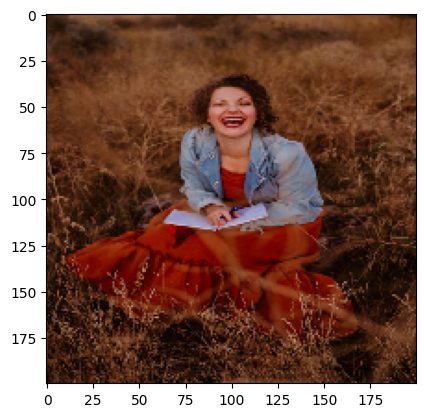

happy2.jpeg


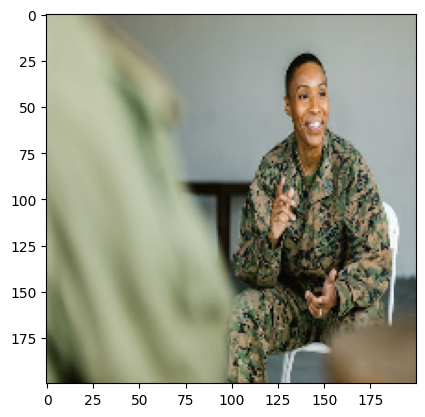

pexels-photo-4100647.webp


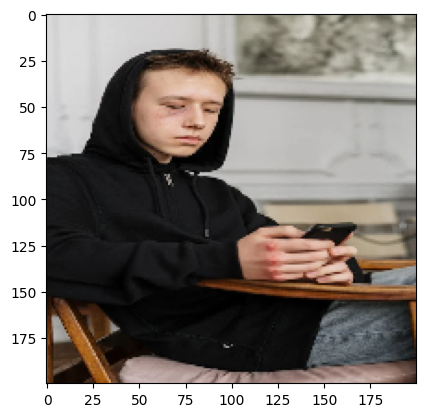

pexels-photo-19149485.webp


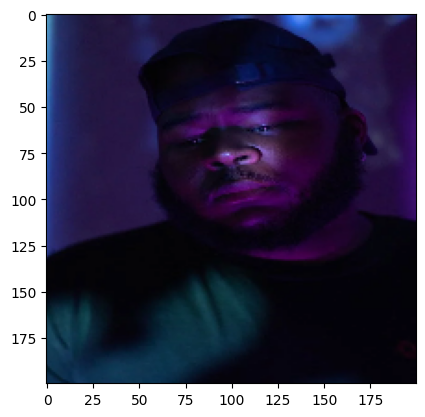

pexels-photo-3214761.jpeg


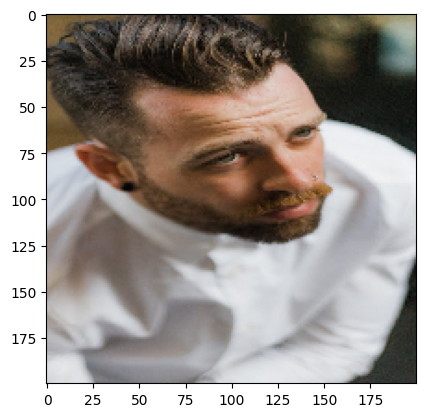

happy4.jpeg


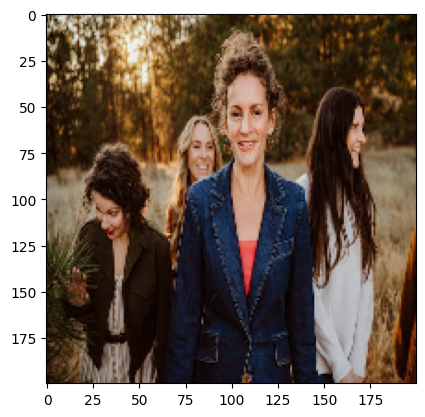

In [37]:
dir_path = '/content/drive/MyDrive/mood classification /testng'
for i in os.listdir(dir_path ):
    print(i)
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

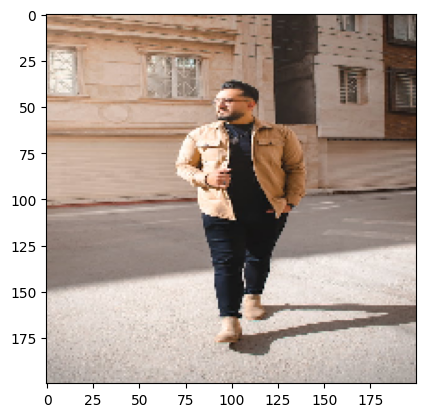

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
 i am not happy


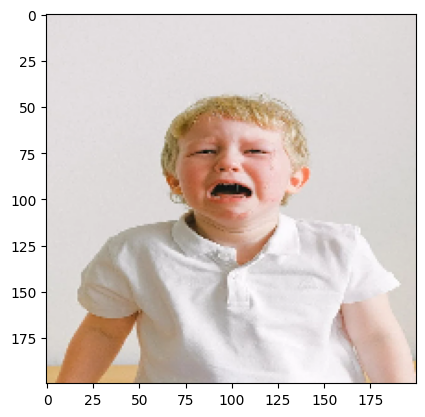

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 i am not happy


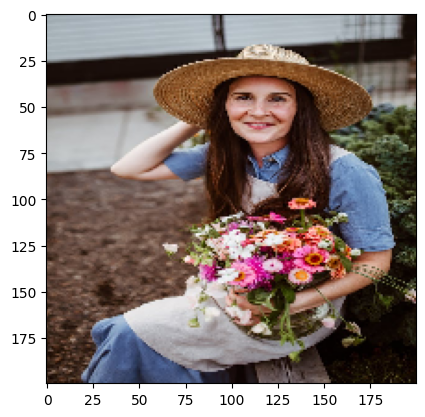

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 i am not happy


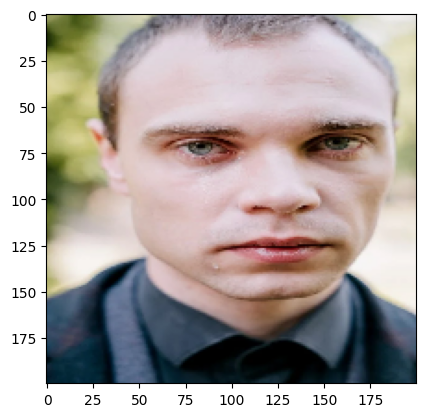

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 i am not happy


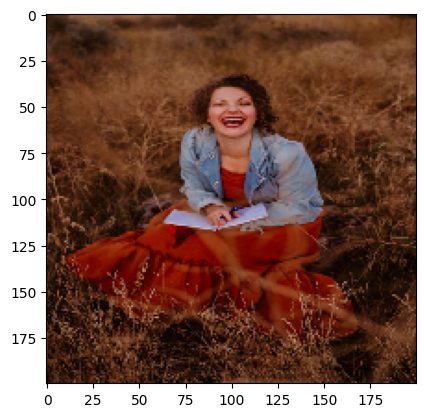

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 i am not happy


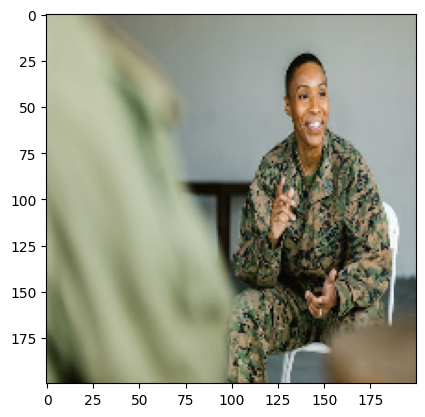

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 i am not happy


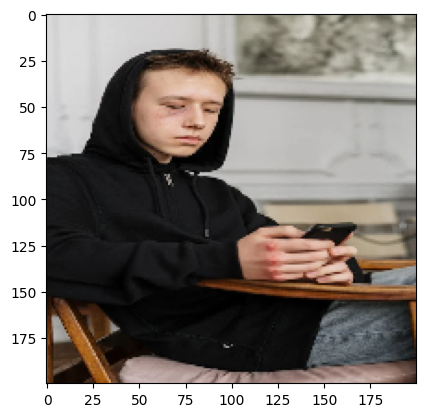

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 i am not happy


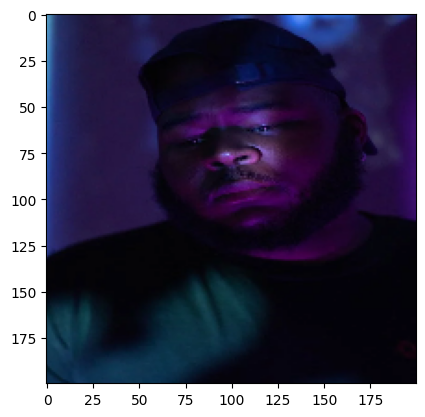

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 i am not happy


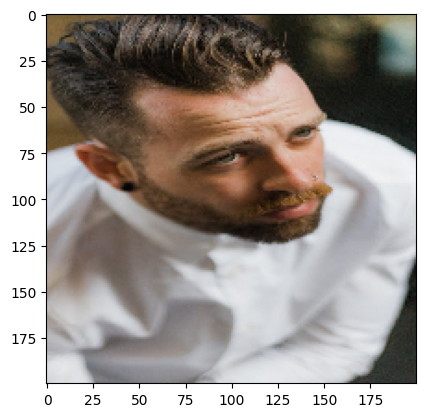

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am happy


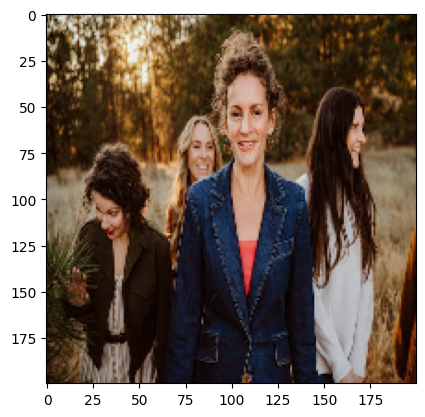

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
 i am not happy


In [38]:
dir_path = '/content/drive/MyDrive/mood classification /testng'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')